<a href="https://colab.research.google.com/github/mahmud-nobe/CS110_pcw/blob/master/CS110_Pre_Class_Work_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Md Mahmudunnobe"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [11]:
import timeit
import random

eps = 1e-16
N = 10000
# three extreme position, 1st position (Oth percentile)
# median (50th percentile) and last element (100th percentile)
locations = [0.0, 0.5, 1.0 - eps]

# compare x2 with both of them, if it is less than one and greather than other, it is median
# do same for x3 and if both of them failed return x1 as median
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    # first and last index of initial array 
    indices = [(0, len(lst))]

    # loop until there is any value left in indices,
    # indices have the first and last index of every subset, if these two index
    # are same  (base case), continue without adding any new value to indices.
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm # Number of elements
        inds = [frm + int(N * n) for n in locations] # index of each extreme locations
        values = [lst[ind] for ind in inds] # values of these extreme locations
        partition = median(*values) # partition is the median of these three values in extreme position

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] # lower list, where all elements lower than partition
        upper = [a for a in lst[frm:to] if a > partition] # upper list, where all elements higher than partition
        counts = sum([1 for a in lst[frm:to] if a == partition]) # count how many elements are same as partition

        ind1 = frm + len(lower) # last index of the lower list
        ind2 = ind1 + counts # first index of the upper list

        # Push back into correct place:
        lst[frm:ind1] = lower # replace lower list in the first positions
        lst[ind1:ind2] = [partition] * counts # then the partition value
        lst[ind2:to] = upper # then the upper list

        # Enqueue other locations
        # so that they can again go to the loop and continue partitioning
        indices.append((frm, ind1)) 
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)]
    # shuffling the list to get a randimized order
    random.shuffle(lst)
    # sort the list using qsort
    return qsort(lst)


def test_quicksort():
    # lst is initially a list of range 0 to N, 
    # then it got shuffled in randomized_quick_sort, then go in qsort for sorting
    lst = randomized_quicksort()
    # if qsort works fine, we should finally get the list as range 0 to N again
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
# if not then asser will print an error
test_quicksort()

# How fast is our algorithm
# here inout array size, N = 10000 and it will print the running time of randomized_quicksort if we run it only one time.
print(timeit.timeit(randomized_quicksort, number=1))

0.06309767900029328


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

In cormen, in Randomized-Quicksort, they don't randomize the whole array. They randomly pick a index every time and make it the pivot.

While here, we are not randomly choosing the pivot. Rather we randomly shuffle the whole array and then use the median of the 1st, last and middle element as our pivot.

Also in cormen, it is a recursive function but here it is non-recursive.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [0]:
time_qsort = []

for N in range(1,1000): # N will go from 1 to 1000
  time = 0
  for i in range(10): # run it 10 time and take the average
    time += timeit.timeit(randomized_quicksort, number=1)
  time_qsort.append(time/10) # adding the average time in the list

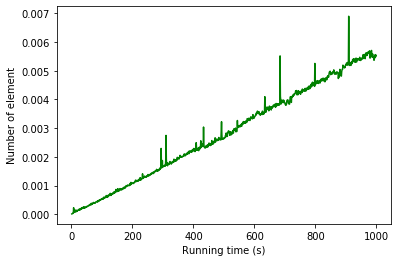

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1,1000), time_qsort, 'g')
plt.xlabel('Running time (s)')
plt.ylabel('Number of element')
plt.show()
#raise NotImplementedError()

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [0]:
def qsort(lst):
    # first and last index of initial array 
    indices = [(0, len(lst))]

    # loop until there is any value left in indices,
    # indices have the first and last index of every subset, if these two index
    # are same  (base case), continue without adding any new value to indices.
    while indices:
        (frm, to) = indices.pop()
        if to - frm <= 1:
            continue

        # Find the partition:
        size = to - frm # Number of elements
        inds = [frm + int(size * n) for n in locations] # index of each extreme locations
        print(lst, inds)
        values = [lst[ind] for ind in inds] # values of these extreme locations
        partition = median(*values) # partition is the median of these three values in extreme position

        # Split into lists:
        lower = [a for a in lst[frm:to] if a <= partition] # lower list, where all elements lower than or equal to the partition
        upper = [a for a in lst[frm:to] if a > partition] # upper list, where all elements higher than partition

        ind1 = frm + len(lower) # last index of the lower list
        ind2 = ind1  # first index of the upper list

        # Push back into correct place:
        lst[frm:ind1] = lower # replace lower list in the first positions
        # lst[ind1:ind2] = [partition] * counts # then the partition value
        lst[ind2:to] = upper # then the upper list
        print(lst, frm, ind1, ind2, to, lower, upper)
        # Enqueue other locations
        # so that they can again go to the loop and continue partitioning
        indices.append((frm, ind1)) 
        indices.append((ind2, to))
    return lst

    raise NotImplementedError()

In [16]:
qsort([4,2,1])
# trying to decode, something is not ok...

Streaming output truncated to the last 5000 lines.
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2 [2, 1] []
[2, 1, 4] [0, 1, 1]
[2, 1, 4] 0 2 2 2

KeyboardInterrupt: ignored

In [0]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [0]:
time_qsort1 = []

for N in range(1,1000): # N will go from 1 to 1000
  time = 0
  for i in range(10): # run it 10 time and take the average
    time += timeit.timeit(randomized_quicksort, number=1)
  time_qsort1.append(time/10) # adding the average time in the list
  
# raise NotImplementedError()

In [0]:
plt.plot(range(1,1000), time_qsort, 'g')
plt.plot(range(1,1000), time_qsort1, 'b')
plt.xlabel('Running time (s)')
plt.ylabel('Number of element')
plt.legend(('Initial quicksort', 'New quicksort'))
plt.show()
#raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [0]:
def qsort(lst):
    # first and last index of initial array 
    indices = [(0, len(lst))]

    # loop until there is any value left in indices,
    # indices have the first and last index of every subset, if these two index
    # are same  (base case), continue without adding any new value to indices.
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm # Number of elements
        inds = [frm + int(N * n) for n in locations] # index of each extreme locations
        values = [lst[ind] for ind in inds] # values of these extreme locations
        partition = lst[0] # partition is the first element

        # Split into lists:
        lower = [a for a in lst[frm:to] if a <= partition] # lower list, where all elements lower than or equal to the partition
        upper = [a for a in lst[frm:to] if a > partition] # upper list, where all elements higher than partition

        ind1 = frm + len(lower) # last index of the lower list
        ind2 = ind1 + 1 # first index of the upper list

        # Push back into correct place:
        lst[frm:ind1] = lower # replace lower list in the first positions
        # lst[ind1:ind2] = [partition] * counts # then the partition value
        lst[ind2:to] = upper # then the upper list

        # Enqueue other locations
        # so that they can again go to the loop and continue partitioning
        indices.append((frm, ind1)) 
        indices.append((ind2, to))
    return lst
    #raise NotImplementedError()

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [0]:
time_qsort2 = []

for N in range(1,1000): # N will go from 1 to 1000
  time = 0
  for i in range(10): # run it 10 time and take the average
    time += timeit.timeit(randomized_quicksort, number=1)
  time_qsort2.append(time/10) # adding the average time in the list
  
# raise NotImplementedError()raise NotImplementedError()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


YOUR ANSWER HERE